# Word-based Embedding LSTM: Training

In [1]:
import sys
sys.path.append('..')

import os

import numpy as np

from IPython.display import SVG
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import model_to_dot

from src import models, preprocessing, utils

Using TensorFlow backend.


In [2]:
## Some useful parameters
KEY = 'embedding_lstm'
DIR = os.path.join(utils.MODELS_DIR, KEY)

size = 20      # dimensions of embedding space
units = 256    # number of LSTM units
window_size = 5  # number of words for LSTM

### Load data

In [3]:
sonnets = utils.load_shakespeare()

### Pre-processing

In [5]:
encoding, encoded_sonnets = preprocessing.encode_words_onehot(sonnets)
n_words = len(encoding)

In [5]:
# Generate training data.
X = []
Y = []
for sonnet in encoded_sonnets:
    x = np.zeros((len(sonnet) - window_size, window_size))
    y = np.zeros((len(sonnet) - window_size, n_words))
    
    for i in range(len(sonnet) - window_size):
        # Input requires categorical label.
        x[i] = np.argmax(sonnet[i:i+window_size], axis=1)
        y[i] = sonnet[i+window_size]
    X.append(x)
    Y.append(y)
X = np.vstack(X)
Y = np.vstack(Y)

### Define model

In [6]:
# Save model parameters.
params = {
    'units': units,
    'size': size,
    'window_size': window_size,
    'encoding': encoding
}
utils.save_pickle(params, os.path.join(DIR, 'params.pkl'))

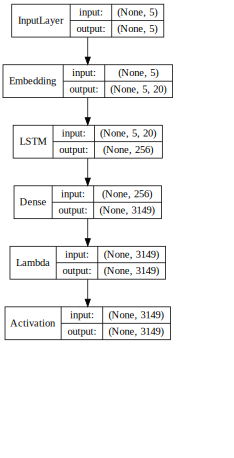

In [9]:
model = models.EmbeddingLSTM(units, window_size, n_words, size)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Plot model architecture.
SVG(model_to_dot(model, show_shapes=True, show_layer_names=False).create(prog='dot', format='svg'))

### Train

In [8]:
# Save model with best accuracy.
save_path = os.path.join(DIR, 'model-{epoch:03d}-{loss:.4f}.h5')
checkpoint = ModelCheckpoint(save_path, monitor='loss', verbose=1, save_best_only=True, mode='min')
# Early stopping condition. Stop when loss has stopped decreasing for 5 epochs.
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=5)
model.fit(X, Y, epochs=1000, batch_size=64, callbacks=[checkpoint, es])

c:\users\joseph\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/1000
19256/19256 [==============================] - 3s 164us/step - loss: 6.4571 - accuracy: 0.1112

Epoch 00001: loss improved from inf to 6.45706, saving model to C:\Users\Joseph\Documents\GitHub\cs155-miniproject3\models\embedding_lstm\model-001-6.4571.h5
Epoch 2/1000
19256/19256 [==============================] - 3s 134us/step - loss: 6.0356 - accuracy: 0.1119

Epoch 00002: loss improved from 6.45706 to 6.03563, saving model to C:\Users\Joseph\Documents\GitHub\cs155-miniproject3\models\embedding_lstm\model-002-6.0356.h5
Epoch 3/1000
19256/19256 [==============================] - 3s 134us/step - loss: 5.9206 - accuracy: 0.1136

Epoch 00003: loss improved from 6.03563 to 5.92055, saving model to C:\Users\Joseph\Documents\GitHub\cs155-miniproject3\models\embedding_lstm\model-003-5.9206.h5
Epoch 4/1000
19256/19256 [==============================] - 2s 129us/step - loss: 5.7790 - accuracy: 0.1308

Epoch 00004: loss improved from 5.92055 to 5.77904, saving model to C:\Users\Josep